[**UCI Iris dataset**](https://archive.ics.uci.edu/dataset/53/iris)

In [1]:
from ucimlrepo import fetch_ucirepo 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# fetch dataset 
iris = fetch_ucirepo(id=53) 
  
# data (as pandas dataframes) 
X = iris.data.features 
y = iris.data.targets 
  
df = pd.concat([X, y], axis = 1)

df


,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


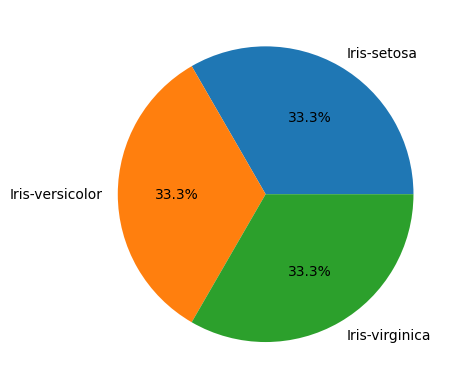

In [2]:
import seaborn as sns

df['class'].value_counts().plot.pie(
    autopct = '%1.1f%%'
)
plt.ylabel('')
plt.show()

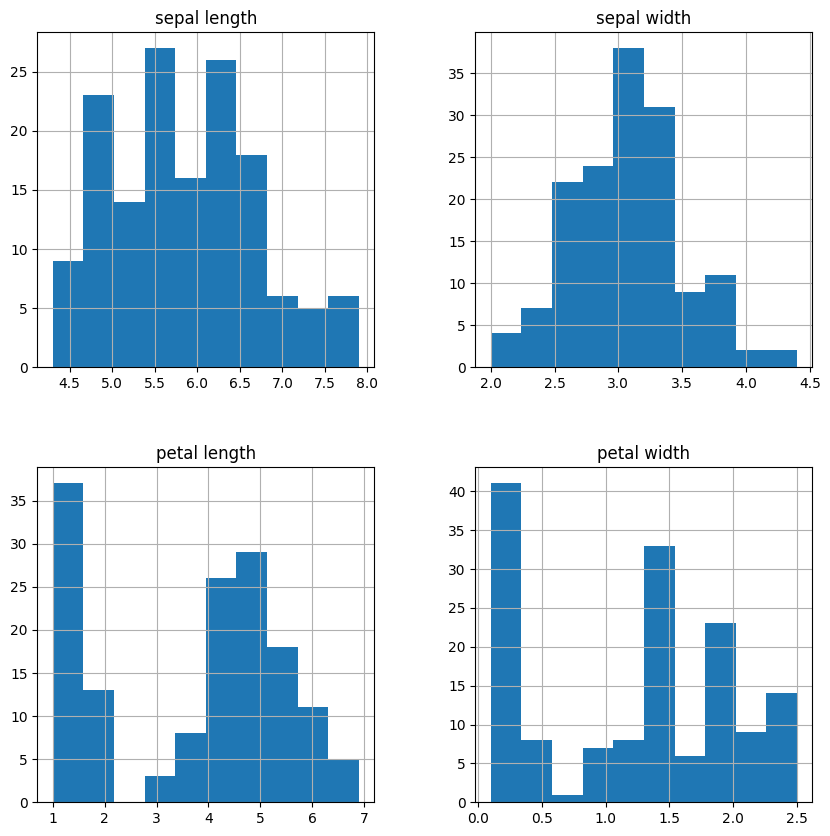

In [3]:
df.hist(bins = 10, figsize = (10, 10))

plt.show()

In [4]:
df.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

In [5]:
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


C:\Users\ducth\AppData\Local\Temp\ipykernel_2540\2510834565.py:7: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  df['encoded class'] = le.fit_transform(df['class'].ravel())


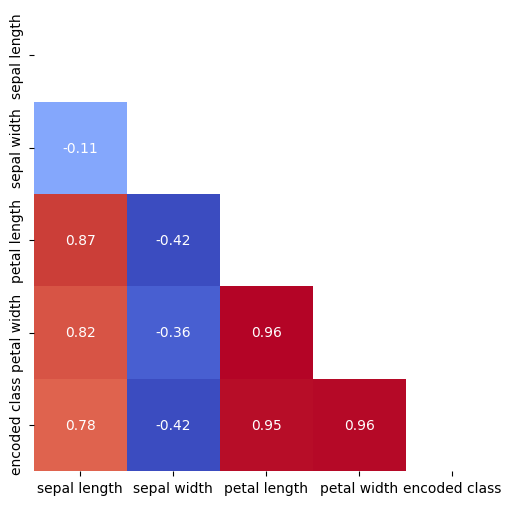

In [6]:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()



df['encoded class'] = le.fit_transform(df['class'].ravel())

corr_df = df.drop(columns='class', axis = 1)

matrix = corr_df.corr()

mask = np.triu(np.ones_like(matrix, dtype= bool))

plt.figure(figsize= (6, 6))
sns.heatmap(matrix, mask= mask, cmap = 'coolwarm', cbar = False,
            annot = True)

plt.show()

In [8]:
df.columns

X = df[['sepal length', 'sepal width', 'petal length', 'petal width']]

y = df[['encoded class']]

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 8, test_size= 0.2)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('forest_classify', RandomForestClassifier(random_state= 8))]
)


pipeline.fit(X_train, y_train.values.ravel())





,steps,"[('scaler', ...), ('forest_classify', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.80      0.89      0.84         9
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.90      0.90      0.90        30
   weighted avg       0.90      0.90      0.90        30



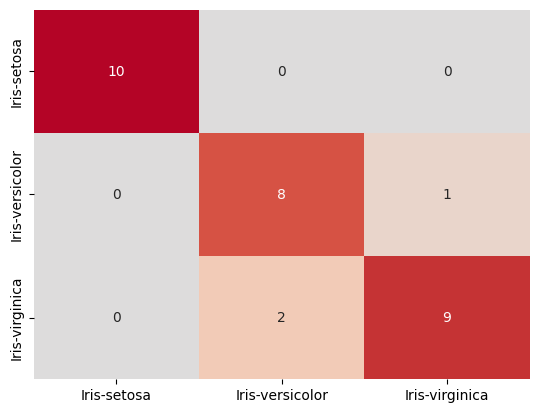

In [10]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = pipeline.predict(X_test)

print(classification_report(y_true = y_test, y_pred= y_pred, target_names= df['class'].unique()))

cm = confusion_matrix(y_true = y_test, y_pred= y_pred)

sns.heatmap(cm, cmap = 'coolwarm', annot = True, xticklabels= df['class'].unique(), yticklabels= df['class'].unique(),
            fmt = 'd', cbar = False, center = 0)

plt.show()

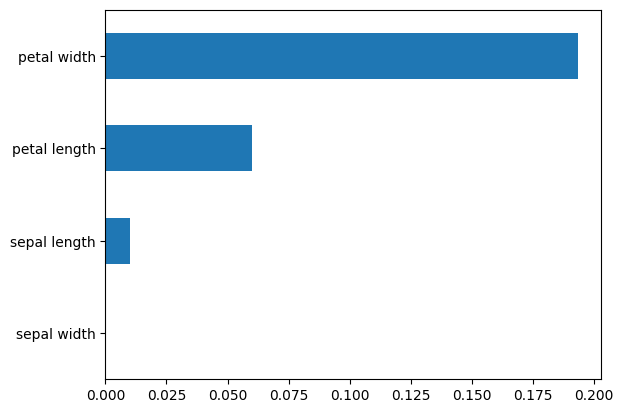

In [13]:
from sklearn.inspection import permutation_importance

feat_name = X.columns

result = permutation_importance(pipeline, X_test, y_test, random_state= 8,
                                n_repeats= 10)

perm = pd.Series(result.importances_mean, index = feat_name).sort_values()

perm.plot(kind = 'barh')

plt.show()
